### Metody numeryczne 1 - Lista 5

#### Zadanie 1:

Gęstość powietrza zmienia się z wysokością $h$ w następujący sposób:



|<span style="font-weight:normal">$$h(\textrm{km})$$</span>| <span style="font-weight:normal">0 </span>|<span style="font-weight:normal"> 3 </span>| <span style="font-weight:normal">6</span> |
|--|---|---|---|
|$$\rho(\textrm{kg/m}^3)$$| 1.225 | 0.905 | 0.652|


Wyraź $\rho(h)$ jako funkcję kwadratową h

#### Rozwiązanie:

In [4]:
import numpy as np

# Dane
wysokosci = np.array([0, 3, 6])  # wysokości
gestosci = np.array([1.225, 0.905, 0.652])  # gęstości powietrza

# Tworzymy macierz układu równań
A = np.vstack([wysokosci**2, wysokosci, np.ones_like(wysokosci)]).T

# Rozwiązujemy układ równań
a, b, c = np.linalg.lstsq(A, gestosci, rcond=None)[0]

# Wyświetlam wyniki
print(f'Współczynniki funkcji kwadratowej:')
print(f'a = {a}, b = {b}, c = {c}')

# Definiuje funkcję kwadratową
def obliczanieFunkcji(h):
    return a * h**2 + b * h + c

# Przykład użycia funkcji
wysokosc_przykladowa = 4
wynik = obliczanieFunkcji(wysokosc_przykladowa)
print(f'Gęstość powietrza dla h = {wysokosc_przykladowa} km: {wynik} kg/m^3')

#odpowiedz to p(h)= 0.00372x^2-0.1178x +1.225 


Współczynniki funkcji kwadratowej:
a = 0.0037222222222222023, b = -0.1178333333333332, c = 1.2249999999999999
Gęstość powietrza dla h = 4 km: 0.8132222222222223 kg/m^3


#### Zadanie 2:

Oblicz $y'(x)$ w $x=2.1$ oraz pierwiastki $y(x)$ korzystając z następujących danych:

|<span style="font-weight:normal"> x</span> | <span style="font-weight:normal"> 1</span> | <span style="font-weight:normal"> 1.25</span> | <span style="font-weight:normal"> 1.5</span> | <span style="font-weight:normal"> 1.75</span> | <span style="font-weight:normal"> 2</span> |  <span style="font-weight:normal"> 2.25</span> | <span style="font-weight:normal"> 2.5</span> | <span style="font-weight:normal"> 2.75</span> | <span style="font-weight:normal"> 3</span> |
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
|$$y$$| -0.5403| -0.0104| 0.9423| 1.7445| 1.3073| -0.7718| -2.4986| -0.7903| 2.7334|


#### Rozwiązanie:

In [5]:
from scipy.interpolate import CubicSpline as scincu
 
x = [1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3]
y = [-0.5403, -0.0104, 0.9423, 1.7445, 1.3073, -0.7718, -2.4986, -0.7903, 2.7334]
cubicSpline = scincu(x, y)
yPrime = cubicSpline.derivative()
xValue = 2.1
yPrimeValue = yPrime(xValue)
 
print("Wartość pierwszej pochodnej y'(2.1) = ", yPrimeValue)
 
roots = yPrime.roots()
 
print("Pierwiastki funkcji y(x) (Miejsca zerowe pochodnej y'(x)):")
 
for root in roots:
    print("x = ", root)

Wartość pierwszej pochodnej y'(2.1) =  -8.159422441025642
Pierwiastki funkcji y(x) (Miejsca zerowe pochodnej y'(x)):
x =  0.9496363113849483
x =  1.8124546615392558
x =  2.5091595423375797
x =  3.3021256642485253


#### Zadanie 3:
W poniższej tabeli przedstawiony jest współczynnik oporu $c_D$ sfery w cieczy jako funkcja liczby Reynoldsa $Re$. Korzystając z naturalnych funkcji sklejanych, znajdź $c_D$ dla $Re$ = 5, 50 i 5000

|<span style="font-weight:normal">$$Re$$</span>| <span style="font-weight:normal">0.2 </span>|<span style="font-weight:normal"> 2 </span>| <span style="font-weight:normal">20</span> |<span style="font-weight:normal">200</span> |<span style="font-weight:normal">2000</span> |<span style="font-weight:normal">20000</span> |
|:--:|:---:|:---:|:---:|:---:|:---:|:---:|
|$$c_D$$| 103 | 13.9 | 2.72| 0.8| 0.401| 0.433|

*Wskazówka:* Użyj podwójnie logarytmicznej skali
#### Rozwiązanie:

In [1]:
import numpy as np
from scipy.interpolate import CubicSpline

# Dane
Re_wartosci = np.array([0.2, 2, 20, 200, 2000, 20000])
cD_wartosci = np.array([103, 13.9, 2.72, 0.8, 0.401, 0.433])

# Tworzenie funkcji sklejanej
cs = CubicSpline(np.log(Re_wartosci), np.log(cD_wartosci), bc_type='natural')

# Wartości Re, dla których chcemy obliczyć cD
Re_wartosci_do_obliczenia = np.array([5, 50, 5000])

# Obliczanie cD dla danych wartości Re
cD_wartosci_interpolowane = np.exp(cs(np.log(Re_wartosci_do_obliczenia)))

# Wyświetlanie wyników
for Re, cD in zip(Re_wartosci_do_obliczenia, cD_wartosci_interpolowane):
    print(f"Re = {Re}, cD = {cD}")


Re = 5, cD = 6.90159241175195
Re = 50, cD = 1.590835404677944
Re = 5000, cD = 0.3868217720404589


#### Zadanie 4:

Rozwiąż zad. 3 za pomocą interpolacji wielomianowej.

#### Rozwiązanie:

In [6]:
import numpy as np

# Dane
Re_wartosci = np.array([0.2, 2, 20, 200, 2000, 20000])
cD_wartosci = np.array([103, 13.9, 2.72, 0.8, 0.401, 0.433])

# Wartości Re, dla których chcemy obliczyć cD
Re_wartosci_do_obliczenia = np.array([5, 50, 5000])

# Interpolacja wielomianowa
coefficients = np.polyfit(np.log(Re_wartosci), np.log(cD_wartosci), deg=len(Re_wartosci) - 1)
polynomial = np.poly1d(coefficients)

# Obliczanie cD dla danych wartości Re
cD_wartosci_interpolowane = np.exp(polynomial(np.log(Re_wartosci_do_obliczenia)))

# Wyświetlanie wyników
for Re, cD in zip(Re_wartosci_do_obliczenia, cD_wartosci_interpolowane):
    print(f"Re = {Re}, cD = {cD}")


Re = 5, cD = 6.944960610846619
Re = 50, cD = 1.5841142380924338
Re = 5000, cD = 0.370716372085199


#### Zadanie 5:

Dopasuj linię prostą i funkcję kwadratową do `poniższych danych:

|<span style="font-weight:normal">$$x$$</span>| <span style="font-weight:normal">1.0 </span>|<span style="font-weight:normal"> 2.5 </span>| <span style="font-weight:normal">3.5</span> |<span style="font-weight:normal">4.0</span> |<span style="font-weight:normal"> 1.1</span> |<span style="font-weight:normal">1.8</span> |<span style="font-weight:normal">2.2</span> |<span style="font-weight:normal">3.7</span> |
|:--:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|$$y$$| 6.008 | 15.722 | 27.13 | 33.772 | 5.257 | 9.549 |11.098 |28.828|

Która funkcja jest lepiej dopasowana do tych danych?

#### Rozwiązanie:

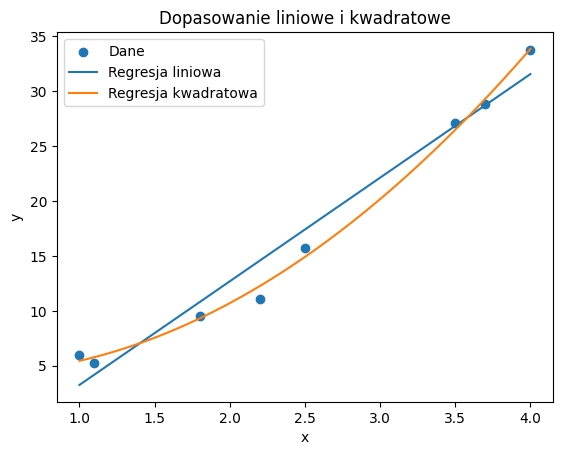

In [5]:
import numpy as np
from scipy.optimize import curve_fit as cf
import matplotlib.pyplot as plt

# Dane
x_values = np.array([1.0, 2.5, 3.5, 4.0, 1.1, 1.8, 2.2, 3.7])
y_values = np.array([6.008, 15.722, 27.13, 33.772, 5.257, 9.549, 11.098, 28.828])


# Dopasowanie liniowe potrzebne do plota
dopasowanieLiniowe = np.polyfit(x_values, y_values, 1)
liniaProsta = np.poly1d(dopasowanieLiniowe)

# Dopasowanie kwadratowe
dopasowanieKwadratowe = np.polyfit(x_values, y_values, 2)
liniaKwadratowa = np.poly1d(dopasowanieKwadratowe)

# Punkty do rysowania wykresu
x_plot = np.linspace(min(x_values), max(x_values), 100)

# Rysowanie wykresu
plt.scatter(x_values, y_values, label='Dane')
plt.plot(x_plot, liniaProsta(x_plot), label='Regresja liniowa')
plt.plot(x_plot, liniaKwadratowa(x_plot), label='Regresja kwadratowa')

# Dodatkowe informacje na wykresie
plt.title('Dopasowanie liniowe i kwadratowe')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Wyświetlanie wykresu
plt.show()


#### Zadanie 6:

Wykorzystaj pomiary względnej gęstości powietrza $\rho$ na wysokości $h$(km)



|<span style="font-weight:normal">$$h(\textrm{km})$$</span>| <span style="font-weight:normal">0 </span>|<span style="font-weight:normal"> 1.525 </span>| <span style="font-weight:normal">3.05</span> |<span style="font-weight:normal">4.575</span> |<span style="font-weight:normal">6.1</span> |<span style="font-weight:normal">7.625</span> |<span style="font-weight:normal">9.150</span> |
|:--:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|$$\rho(\textrm{kg/m}^3)$$| 1 | 0.8617 | 0.7385 | 0.6292 | 0.5328 |0.4481 |0.3741|

do obliczenia $\rho$ na wysokości $h=10.5\,$km. *Wskazówka*: Dopasuj do tych danych
funkcję kwadratową metodą najmniejszych kwadratów.

#### Rozwiązanie:

In [7]:
import numpy as np
from scipy.optimize import curve_fit as cf

# Dane
wysokosci = np.array([0, 1.525, 3.05, 4.575, 6.1, 7.625, 9.15])
gestosci = np.array([1, 0.8617, 0.7385, 0.6292, 0.5328, 0.4481, 0.3741])

# Funkcja kwadratowa
def quadratic_func(x, a, b, c):
    return a * x**2 + b * x + c

# Dopasowanie kwadratowe
wyniki, _ = cf(quadratic_func, wysokosci, gestosci)

# Wartość gęstości na h=10.5 km
wysokoscNa10Km = 10.5
celNa105Km = quadratic_func(wysokoscNa10Km, *wyniki)

# Wyświetlanie wyników
print(f'Współczynniki funkcji kwadratowej:')
print(f'a = {wyniki[0]}, b = {wyniki[1]}, c = {wyniki[2]}')

print(f'Przybliżona gęstość na wysokości {wysokoscNa10Km} km: {celNa105Km} kg/m^3')


Współczynniki funkcji kwadratowej:
a = 0.0027632101009355467, b = -0.09344730684922747, c = 0.9988952381654874
Przybliżona gęstość na wysokości 10.5 km: 0.322342429876743 kg/m^3
